In [9]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

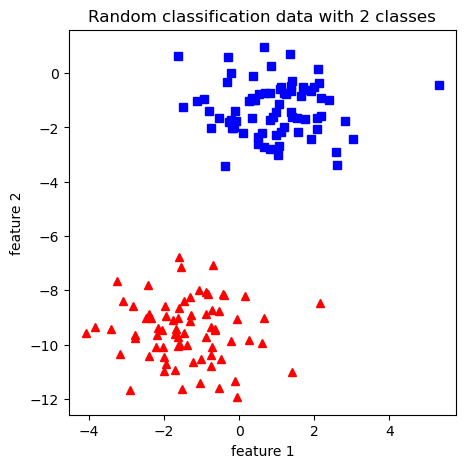

In [13]:
x,y = datasets.make_blobs(n_samples=150,n_features=2,centers=2,cluster_std=1.05,random_state=2)

fig = plt.figure(figsize = (5,5))
plt.plot(x[:,0][y==0],x[:,1][y==0],'r^')
plt.plot(x[:,0][y==1],x[:,1][y==1],'bs')
plt.xlabel("feature 1")

plt.ylabel("feature 2")
plt.title("Random classification data with 2 classes")
plt.show()

In [14]:
def step_fun(z):
    return 1.0 if(z>0) else 0.0

def perceptron(x,y,lr,epochs):
    m,n = x.shape
#     print(m,n)
    theta = np.zeros((n+1,1))
#     print(theta)
    
    n_miss_list = []
    for epoch in range(epochs):
        n_miss = 0
        for idx,x_i in enumerate(x):
            x_i = np.insert(x_i,0,1).reshape(-1,1)
            y_hat = step_fun(np.dot(x_i.T,theta))
            if(np.squeeze(y_hat) - y[idx])!=0:
                theta += lr*((y[idx] - y_hat)*x_i)
                n_miss += 1
        n_miss_list.append(n_miss)
#     print(theta)
#     print(n_miss_list)
#     print(len(n_miss_list))
    return theta,n_miss_list 

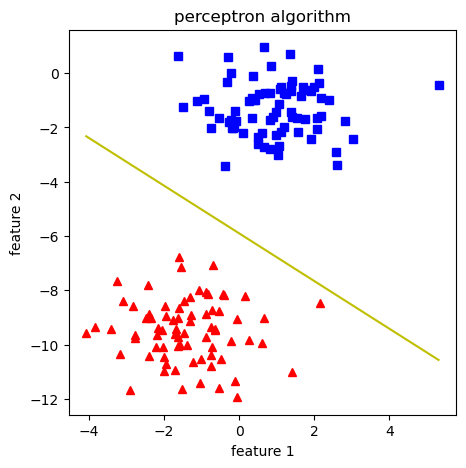

In [15]:
def plot_decision_boundary(x,theta):
    x1 = [min(x[:,0]),max(x[:,0])]
    m= -theta[1]/theta[2]
    c= -theta[0]/theta[2]
    x2 = m*x1+c
    
    plt.figure(figsize=(5,5))
    plt.plot(x[:,0][y==0],x[:,1][y==0],'r^')
    plt.plot(x[:,0][y==1],x[:,1][y==1],'bs')
    plt.xlabel("feature 1")

    plt.ylabel("feature 2")
    plt.title("perceptron algorithm")
    plt.plot(x1,x2,'y-')
    
theta,miss_1 = perceptron(x,y,0.5,100)
plot_decision_boundary(x,theta)